##  1. pytorch中的gather函数

gather的作用用途：方便从批量tensor中获取指定索引下的数据，该索引是高度自定义化的，可乱序的

参考链接：
- https://blog.csdn.net/leviopku/article/details/108735704

- https://pytorch.org/docs/stable/generated/torch.gather.html#torch.gather

torch.gather(input, dim, index, *, sparse_grad=False, out=None) → Tensor

Gathers values along an axis specified by dim.

For a 3-D tensor the output is specified by:

out[i][j][k] = input[index[i][j][k]][j][k]  # if dim == 0

out[i][j][k] = input[i][index[i][j][k]][k]  # if dim == 1

out[i][j][k] = input[i][j][index[i][j][k]]  # if dim == 2

input and index must have the same number of dimensions. It is also required that index.size(d) <= input.size(d) for all dimensions d != dim. out will have the same shape as index. Note that input and index do not broadcast against each other.

Parameters

- input (Tensor) – the source tensor

- dim (int) – the axis along which to index

- index (LongTensor) – the indices of elements to gather

Keyword Arguments

- sparse_grad (bool, optional) – If True, gradient w.r.t. input will be a sparse tensor.

- out (Tensor, optional) – the destination tensor


In [1]:
import torch
a=torch.arange(15).view(3,5)
print(a)

b=torch.zeros_like(a)
b[0][1]=1
b[0][0]=1
c=a.gather(0,b)
d=a.gather(1,b)
print(c)
print(d)

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]])
tensor([[5, 6, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])
tensor([[ 1,  1,  0,  0,  0],
        [ 5,  5,  5,  5,  5],
        [10, 10, 10, 10, 10]])


## zip函数使用方法


## * 和** 传入参数的介绍

参考链接：https://blog.csdn.net/weixin_36670529/article/details/115333901

- 带一个(*)号参数的函数传入的参数存储为一个元组（tuple）
- 带两个星号（*）参数的函数传入的参数则存储为一个字典（dict），并且再调用是采取a=1,b=2,c=3的形式
- 传入的参数个数不定，所以当与普通参数一同使用时，必须把带星号的参数放在最后。
- 参数前加一个星号，将传递进来的参数放在同一个元组中，该参数的返回值是一个元组
- 参数前两个星号，将传递进来的参数放到同一个字典中，该参数返回值为一个字典



In [1]:
def function_with_one_star(*d):
    print(d, type(d))
 
def function_with_two_stars(**d):
    print(d, type(d))
 
# 上面定义了两个函数，分别用了带一个星号和两个星号的参数，它们是什么意思，运行下面的代码：
print(function_with_one_star(1, 2, 3))
print(function_with_two_stars(a = 1, b = 2, c = 3))


(1, 2, 3) <class 'tuple'>
None
{'a': 1, 'b': 2, 'c': 3} <class 'dict'>
None


## nn.Upsample()函数用法
上采样，相当于将输入的图片的大小进行等比例缩放
- 参考链接：https://www.cnblogs.com/wanghui-garcia/p/11399053.html
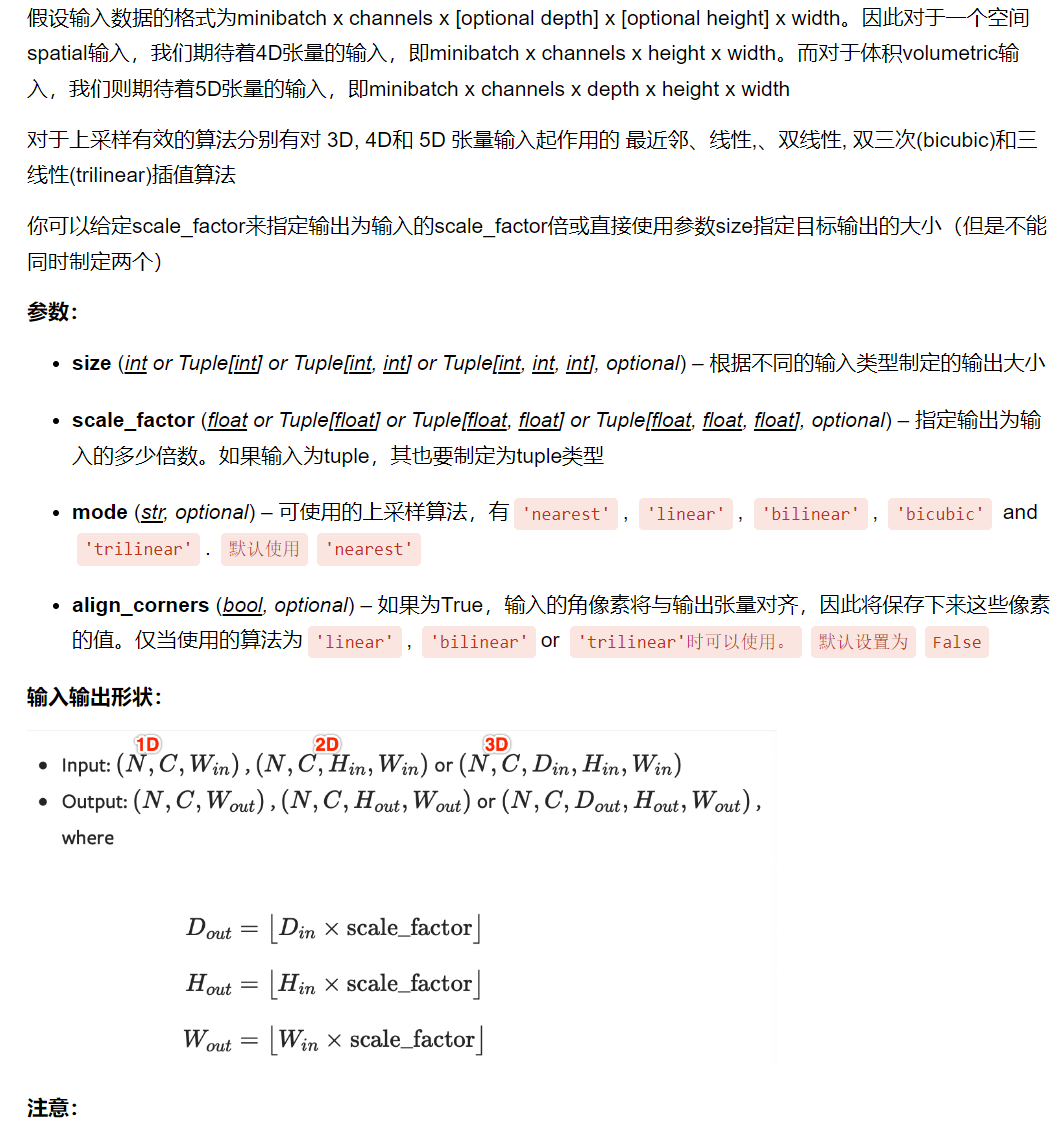

### torchstack()官方详解
- 参考链接：https://pytorch.org/docs/main/generated/torch.stack.html

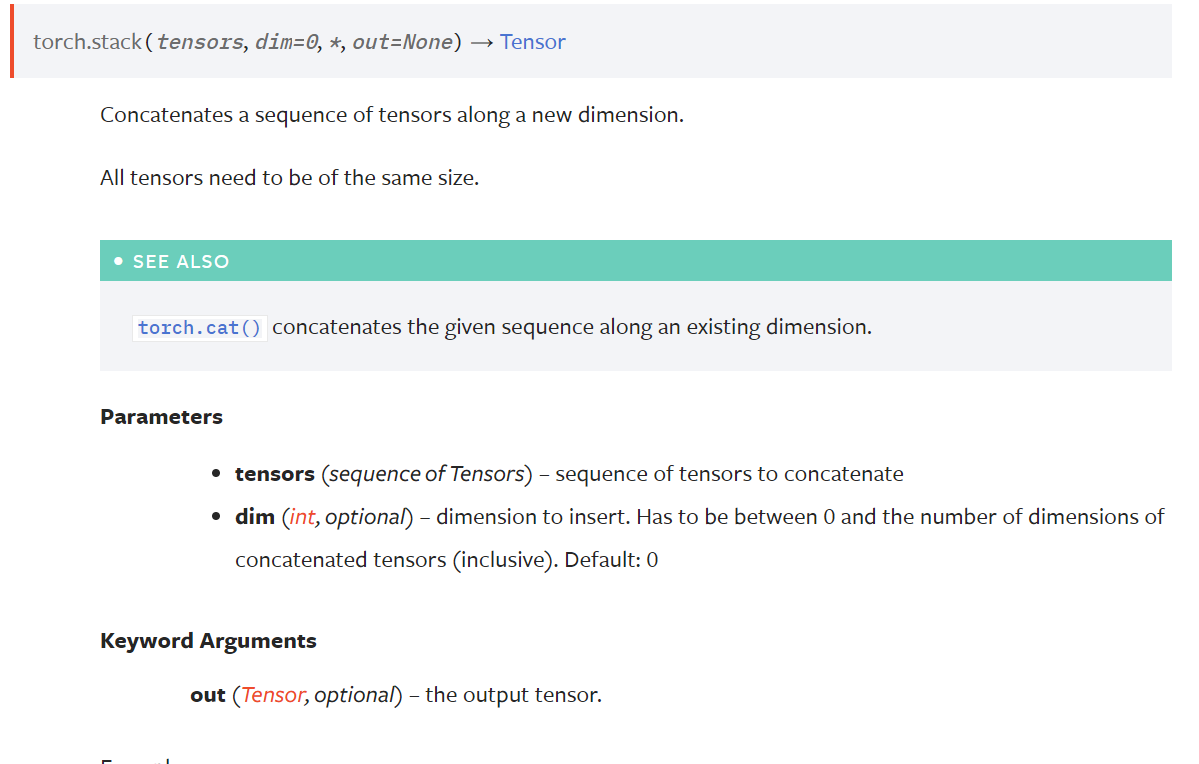

In [3]:
import torch
x = torch.randn(2, 3)
print(x)
print(torch.stack((x, x))) # same as torch.stack((x, x), dim=0)

print(torch.stack((x, x)).size())
print(torch.stack((x, x), dim=1).shape)

print(torch.stack((x, x), dim=2).shape)

print(torch.stack((x, x), dim=-1))


tensor([[-0.4525, -0.3067,  0.0442],
        [-0.1721,  0.8068, -0.4012]])
tensor([[[-0.4525, -0.3067,  0.0442],
         [-0.1721,  0.8068, -0.4012]],

        [[-0.4525, -0.3067,  0.0442],
         [-0.1721,  0.8068, -0.4012]]])
torch.Size([2, 2, 3])
torch.Size([2, 2, 3])
torch.Size([2, 3, 2])
tensor([[[-0.4525, -0.4525],
         [-0.3067, -0.3067],
         [ 0.0442,  0.0442]],

        [[-0.1721, -0.1721],
         [ 0.8068,  0.8068],
         [-0.4012, -0.4012]]])


In [1]:
num_epochs=20
checkpoint_list=[f'epoch_{epoch:04d}.pt' for epoch in range(1,num_epochs+1)]
checkpoint_list

['epoch_0001.pt',
 'epoch_0002.pt',
 'epoch_0003.pt',
 'epoch_0004.pt',
 'epoch_0005.pt',
 'epoch_0006.pt',
 'epoch_0007.pt',
 'epoch_0008.pt',
 'epoch_0009.pt',
 'epoch_0010.pt',
 'epoch_0011.pt',
 'epoch_0012.pt',
 'epoch_0013.pt',
 'epoch_0014.pt',
 'epoch_0015.pt',
 'epoch_0016.pt',
 'epoch_0017.pt',
 'epoch_0018.pt',
 'epoch_0019.pt',
 'epoch_0020.pt']

In [1]:
from diffusers import StableDiffusionPipeline
import torch

# 指定模型路径和其他参数
model_id = "CompVis/stable-diffusion-v1-4"  # 或你自己的模型路径
vae = None  # 如果有特定的 VAE，可以加载；否则可以省略
unet = None  # 如果有特定的 UNet，也可以加载；否则可以省略
scheduler = None  # 指定调度器，如果没有可以省略

pipeline = StableDiffusionPipeline.from_pretrained(
    model_id,
    vae=vae,
    unet=unet,
    scheduler=scheduler,
    torch_dtype=torch.float16  # 使用半精度浮点数，适合 GPU
)


c:\Users\zhangwanzhuang\miniconda3\envs\myconda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Couldn't connect to the Hub: (MaxRetryError("HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /api/models/CompVis/stable-diffusion-v1-4 (Caused by ProxyError('Unable to connect to proxy', SSLError(SSLZeroReturnError(6, 'TLS/SSL connection has been closed (EOF) (_ssl.c:1135)'))))"), '(Request ID: d4cf9480-966a-4e2e-aaf9-e9d5329f2bca)').
Will try to load from local cache.


OSError: Cannot load model CompVis/stable-diffusion-v1-4: model is not cached locally and an error occurred while trying to fetch metadata from the Hub. Please check out the root cause in the stacktrace above.

In [1]:
from datasets import load_dataset

dataset = load_dataset("monash_tsf", "traffic_hourly")

c:\Users\zhangwanzhuang\miniconda3\envs\myconda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ConnectionError: Couldn't reach 'monash_tsf' on the Hub (ProxyError)

### load_dataset（）函数介绍